# Data Project - Stock Market Analysis 

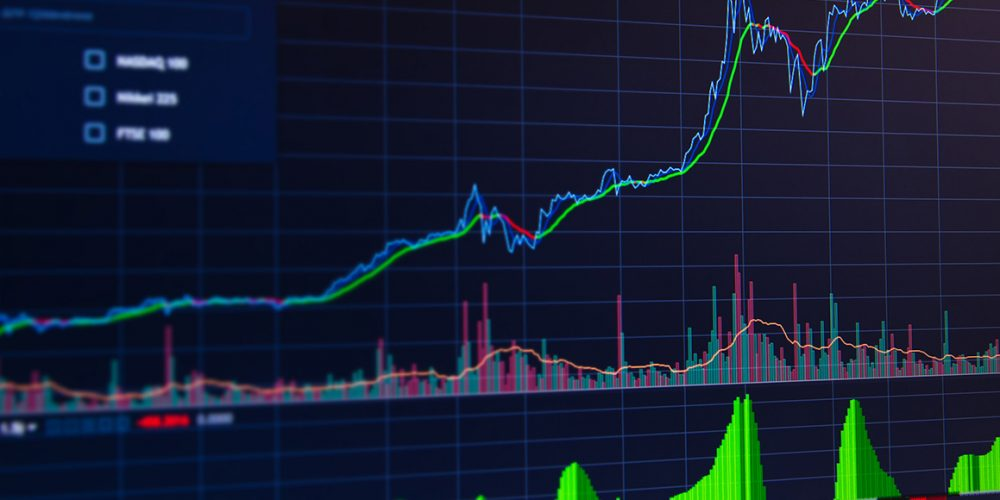

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1. What was the change in price of the stock over time?
    2. What was the daily return of the stock on average?
    3. What was the moving average of the various stocks?
    4. What was the correlation between different stocks'?
    5. How much value do we put at risk by investing in a particular stock?
    6. How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

***   

## Getting the Data
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance: [Reliably download historical market data from with Python](https://aroussi.com/post/python-yahoo-finance)

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

!pip install -q yfinance

In [88]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-11-07,140.550003,143.369995,140.500000,142.710007,142.710007,53553500,AMAZON
2023-11-08,142.970001,143.119995,141.220001,142.080002,142.080002,44521700,AMAZON
2023-11-09,142.020004,142.649994,139.839996,140.600006,140.600006,36235400,AMAZON
2023-11-10,140.460007,143.649994,139.910004,143.559998,143.559998,49287800,AMAZON
2023-11-13,142.080002,143.229996,140.669998,142.589996,142.589996,35680600,AMAZON
2023-11-14,145.000000,147.259995,144.679993,145.800003,145.800003,56674600,AMAZON
2023-11-15,147.059998,147.289993,142.589996,143.199997,143.199997,63875700,AMAZON
2023-11-16,140.910004,143.320007,139.520004,142.830002,142.830002,49653500,AMAZON
2023-11-17,142.660004,145.229996,142.539993,145.179993,145.179993,49636700,AMAZON


This code is creating a new column called 'company_name' in each DataFrame (`AAPL`, `GOOG`, `MSFT`, `AMZN`) and populating it with the corresponding company name from the `company_name` list.

Here's a step-by-step breakdown:

1. **`for company, com_name in zip(company_list, company_name):`**: This is a loop that iterates through pairs of elements from `company_list` and `company_name`. `zip` combines elements from two lists into pairs.

2. **`company["company_name"] = com_name`**: For each iteration of the loop, it takes a DataFrame (`company`) from `company_list` and assigns the corresponding company name (`com_name`) from `company_name` list to a new column called 'company_name' in that DataFrame.

After running this loop, each DataFrame in `company_list` will have a new column 'company_name' with the respective company name associated with it. This can be useful for later analysis or visualization where you might want to know the company associated with each row of data.

In [91]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name'], dtype='object')

In [92]:
company_name

['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

In [90]:
company_list

[                  Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2022-11-21  150.160004  150.369995  147.720001  148.009995  147.187302   
 2022-11-22  148.130005  150.419998  146.929993  150.179993  149.345230   
 2022-11-23  149.449997  151.830002  149.339996  151.070007  150.230301   
 2022-11-25  148.309998  148.880005  147.119995  148.110001  147.286743   
 2022-11-28  145.139999  146.639999  143.380005  144.220001  143.418365   
 ...                ...         ...         ...         ...         ...   
 2023-11-14  187.699997  188.110001  186.300003  187.440002  187.440002   
 2023-11-15  187.850006  189.500000  187.779999  188.009995  188.009995   
 2023-11-16  189.570007  190.960007  188.649994  189.710007  189.710007   
 2023-11-17  190.250000  190.380005  188.570007  189.690002  189.690002   
 2023-11-20  189.889999  191.910004  189.880005  191.449997  191.449997   
 
               Volume c

In [57]:
# Assuming df is your DataFrame
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'APPLE_Daily_Return', 'GOOGLE_Daily_Return', 'MICROSOFT_Daily_Return',
       'AMAZON_Daily_Return'],
      dtype='object')


In [63]:
len(company_list)

4

In [67]:
company_list[0]  # apple 
    

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-11-21,150.160004,150.369995,147.720001,148.009995,147.187286,58724100,APPLE
2022-11-22,148.130005,150.419998,146.929993,150.179993,149.345230,51804100,APPLE
2022-11-23,149.449997,151.830002,149.339996,151.070007,150.230301,58301400,APPLE
2022-11-25,148.309998,148.880005,147.119995,148.110001,147.286743,35195900,APPLE
2022-11-28,145.139999,146.639999,143.380005,144.220001,143.418350,69246000,APPLE
...,...,...,...,...,...,...,...
2023-11-13,185.820007,186.029999,184.210007,184.800003,184.800003,43627500,APPLE
2023-11-14,187.699997,188.110001,186.300003,187.440002,187.440002,60108400,APPLE
2023-11-15,187.850006,189.500000,187.779999,188.009995,188.009995,53790500,APPLE


In [64]:
company_list[1] # google 

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-11-21,97.559998,98.720001,95.669998,95.830002,95.830002,18696900,GOOGLE
2022-11-22,96.160004,97.547997,94.410004,97.330002,97.330002,18868900,GOOGLE
2022-11-23,97.339996,99.069000,97.339996,98.820000,98.820000,17568900,GOOGLE
2022-11-25,98.464996,98.940002,97.529999,97.599998,97.599998,8567800,GOOGLE
2022-11-28,97.199997,97.830002,95.889999,96.250000,96.250000,19974500,GOOGLE
...,...,...,...,...,...,...,...
2023-11-13,133.360001,134.110001,132.770004,133.639999,133.639999,16409900,GOOGLE
2023-11-14,135.649994,137.240005,135.100006,135.429993,135.429993,22317300,GOOGLE
2023-11-15,136.639999,136.839996,135.330002,136.380005,136.380005,15840900,GOOGLE


In [65]:
company_list[2]

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-11-21,241.429993,244.669998,241.190002,242.050003,239.922638,26394700,MICROSOFT
2022-11-22,243.589996,245.309998,240.710007,245.029999,242.876434,19665700,MICROSOFT
2022-11-23,245.110001,248.279999,244.270004,247.580002,245.404022,19508500,MICROSOFT
2022-11-25,247.309998,248.699997,246.729996,247.490005,245.314835,9200800,MICROSOFT
2022-11-28,246.080002,246.649994,240.800003,241.759995,239.635178,24778200,MICROSOFT
...,...,...,...,...,...,...,...
2023-11-13,368.220001,368.470001,365.899994,366.679993,365.937256,19986500,MICROSOFT
2023-11-14,371.010010,371.950012,367.350006,370.269989,369.519989,27683900,MICROSOFT
2023-11-15,371.279999,373.130005,367.109985,369.670013,369.670013,26860100,MICROSOFT


In [66]:
company_list[3]

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-11-21,93.970001,95.019997,90.589996,92.459999,92.459999,84330300,AMAZON
2022-11-22,92.620003,93.349998,90.870003,93.199997,93.199997,62192000,AMAZON
2022-11-23,93.239998,94.580002,92.830002,94.129997,94.129997,59414700,AMAZON
2022-11-25,93.790001,94.430000,93.070000,93.410004,93.410004,35088600,AMAZON
2022-11-28,93.930000,96.400002,93.430000,93.949997,93.949997,74943100,AMAZON
...,...,...,...,...,...,...,...
2023-11-13,142.080002,143.229996,140.669998,142.589996,142.589996,35680600,AMAZON
2023-11-14,145.000000,147.259995,144.679993,145.800003,145.800003,56674600,AMAZON
2023-11-15,147.059998,147.289993,142.589996,143.199997,143.199997,63875700,AMAZON


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [3]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,166.384801,168.047760,164.998960,166.617600,166.102417,6.226619e+07
std,18.451849,18.289359,18.609706,18.439063,18.586441,1.853752e+07
min,126.010002,127.769997,124.169998,125.019997,124.325073,3.145820e+07
25%,150.317505,153.110004,149.484997,151.040001,150.404873,4.997552e+07
50%,171.795006,173.295006,170.704994,172.015007,171.611877,5.767955e+07
75%,179.697498,180.907494,177.600006,179.550003,179.198921,6.918645e+07
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.601569e+08


We have only 255 records in one year because weekends are not included in the data.

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [4]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-11-21 to 2023-11-17
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

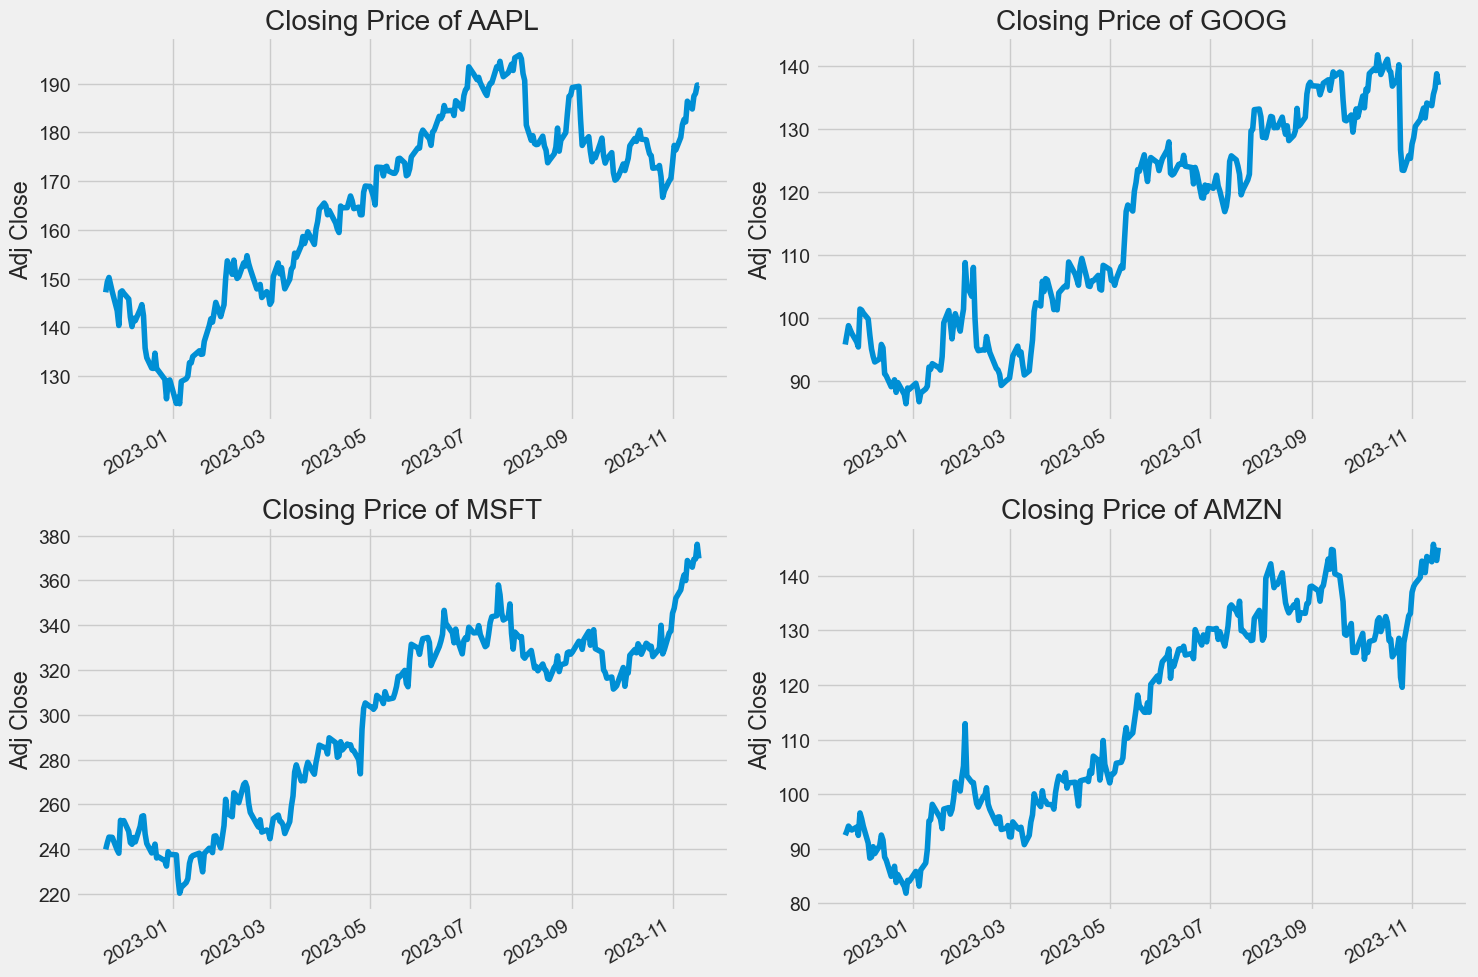

In [5]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

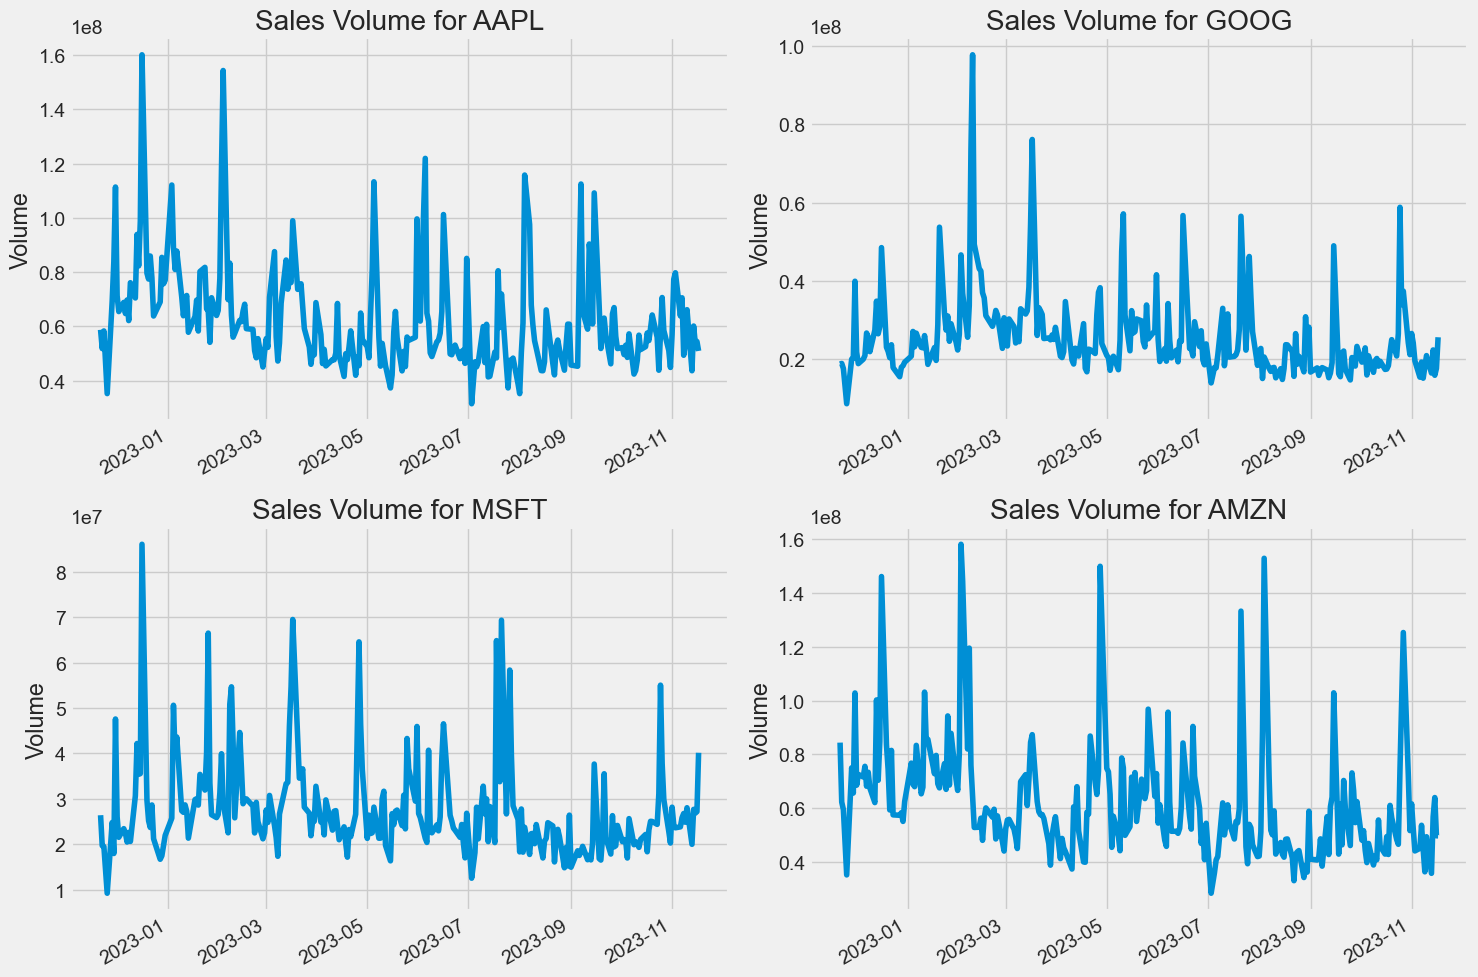

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

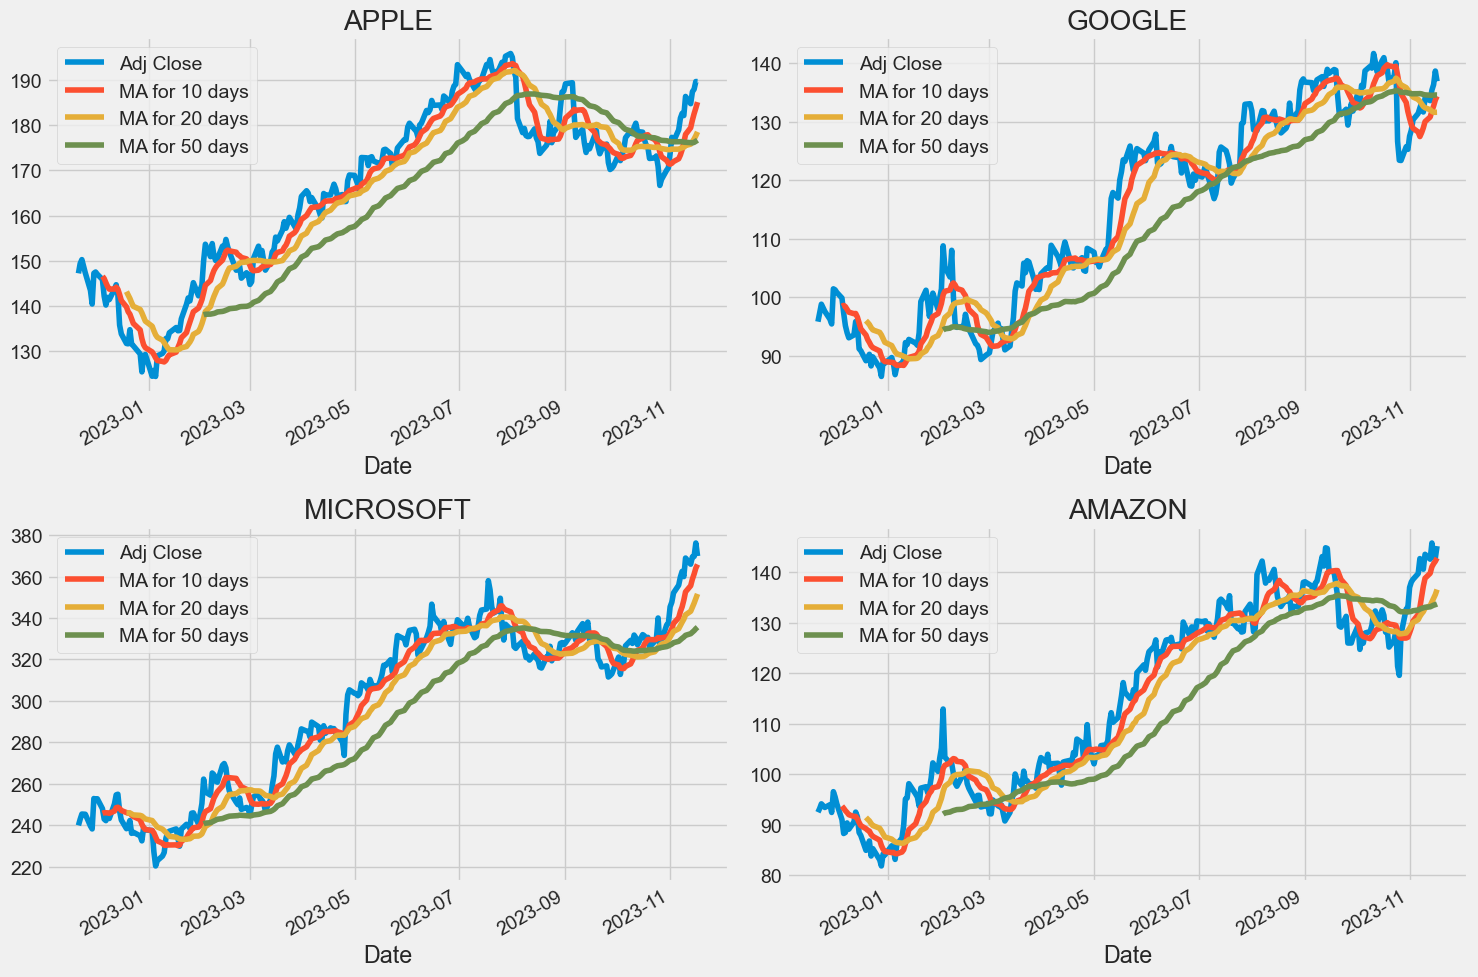

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

In [95]:
import pandas as pd

# Assuming df is your DataFrame
df['Daily Return'] = df.groupby('company_name')['Adj Close'].pct_change()

# Drop NaN values created by the percentage change
df = df.dropna()


This code adds a new column to a DataFrame (`df`) named 'Daily Return'. The new column contains the daily percentage change in the 'Adj Close' column for each company. The `groupby` function is used to group the data by the 'company_name' column before applying the `pct_change()` method. The resulting DataFrame is then cleaned by dropping any rows with NaN values, which are typically created in the first row of each group due to the percentage change calculation.

In [96]:
df

,Open,High,Low,Close,Adj Close,Volume,company_name,Daily Return
Date,,,,,,,,
2022-11-22,148.130005,150.419998,146.929993,150.179993,149.345230,51804100,APPLE,0.014661
2022-11-23,149.449997,151.830002,149.339996,151.070007,150.230301,58301400,APPLE,0.005926
2022-11-25,148.309998,148.880005,147.119995,148.110001,147.286743,35195900,APPLE,-0.019594
2022-11-28,145.139999,146.639999,143.380005,144.220001,143.418365,69246000,APPLE,-0.026264
2022-11-29,144.289993,144.809998,140.350006,141.169998,140.385315,83763800,APPLE,-0.021148
...,...,...,...,...,...,...,...,...
2023-11-14,145.000000,147.259995,144.679993,145.800003,145.800003,56674600,AMAZON,0.022512
2023-11-15,147.059998,147.289993,142.589996,143.199997,143.199997,63875700,AMAZON,-0.017833
2023-11-16,140.910004,143.320007,139.520004,142.830002,142.830002,49653500,AMAZON,-0.002584


Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

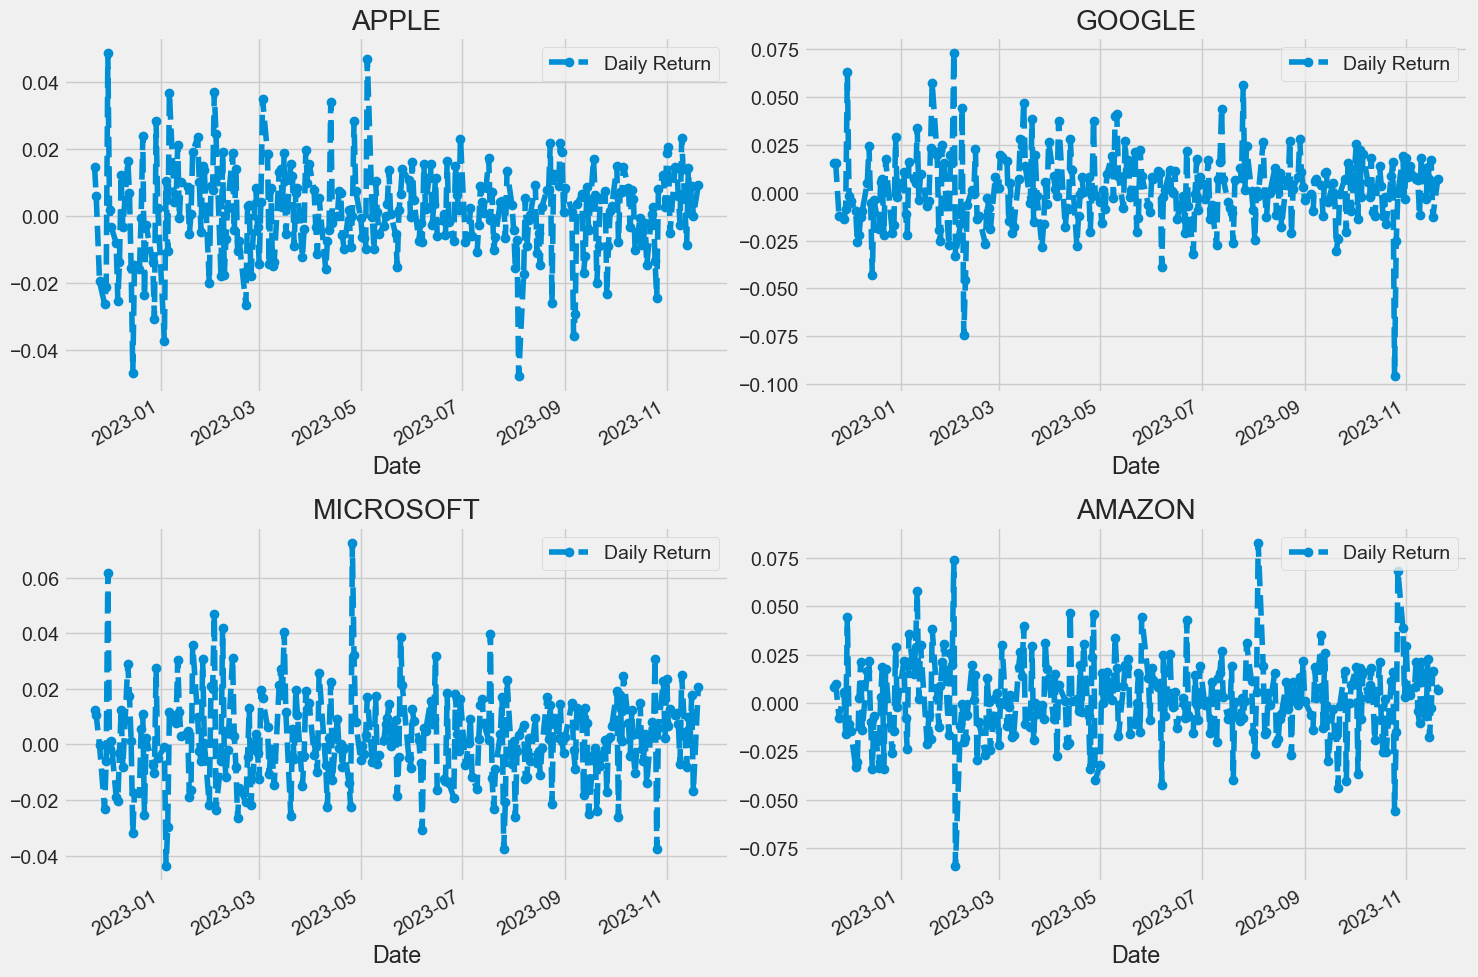

In [93]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

KeyError: 'Daily Return'

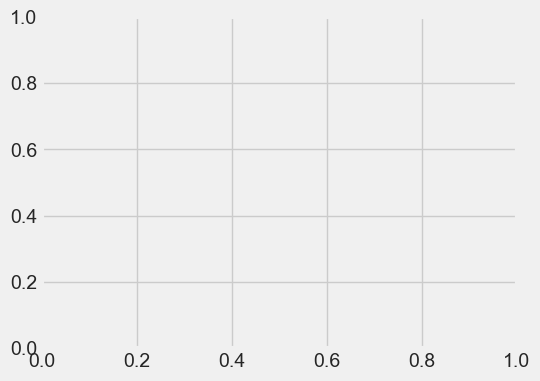

In [86]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## Sharpe value

In [81]:
# Assuming df is your DataFrame
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'Daily Return'],
      dtype='object')

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have the 'Daily Return' column in your dataframe

# Calculate the average daily return
average_daily_return = df.groupby('company_name')['Daily Return'].mean()

print("avg daily return = ", average_daily_return)

# Calculate the standard deviation of daily return
std_daily_return = df.groupby('company_name')['Daily Return'].std()

print("standard dev of daily return = ", std_daily_return)

# Assume a risk-free rate (let's say 0.0 for simplicity, you can replace it with the actual risk-free rate)
risk_free_rate = 0.0

# Calculate the Sharpe ratio
sharpe_ratio = (average_daily_return - risk_free_rate) / std_daily_return

avg daily return =  company_name
AMAZON       0.002048
APPLE        0.001121
GOOGLE       0.001632
MICROSOFT    0.001879
Name: Daily Return, dtype: float64
standard dev of daily return =  company_name
AMAZON       0.021722
APPLE        0.014315
GOOGLE       0.019900
MICROSOFT    0.016774
Name: Daily Return, dtype: float64


In [78]:
# Print or visualize the Sharpe ratio
print("Sharpe Ratio:")
print(sharpe_ratio)

Sharpe Ratio:
company_name
AMAZON       0.094278
APPLE        0.078336
GOOGLE       0.082025
MICROSOFT    0.112008
Name: Daily Return, dtype: float64


The Sharpe ratio is a measure of risk-adjusted return. It is calculated by subtracting the risk-free rate from the return of the investment and dividing the result by the standard deviation of the investment's returns. A higher Sharpe ratio indicates a better risk-adjusted return.

Your Sharpe ratios are:

- **AMAZON: 0.094278**
- **APPLE: 0.078336**
- **GOOGLE: 0.082025**
- **MICROSOFT: 0.112008**

In general, a Sharpe ratio greater than 1 is considered acceptable, with higher values indicating better risk-adjusted returns. Your Sharpe ratios are positive, which is a good sign. However, the interpretation of whether they are "reasonable" depends on the context and the comparison with other investments or benchmarks.

Here are some general guidelines for interpreting Sharpe ratios:

- **Below 1:** Considered poor.
- **1 to 2:** Acceptable.
- **2 to 3:** Very good.
- **Above 3:** Excellent.

It's also important to note that the Sharpe ratio has its limitations. It assumes that returns are normally distributed, which might not be the case in reality, and it doesn't account for changes in risk over time.

In summary, your Sharpe ratios seem reasonable, but for a more comprehensive evaluation, you might want to compare them to a benchmark or similar investments and consider other risk metrics.

Columns in APPLE DataFrame: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name'], dtype='object')
'Daily Return' column not found in APPLE DataFrame.
Columns in GOOGLE DataFrame: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name'], dtype='object')
'Daily Return' column not found in GOOGLE DataFrame.


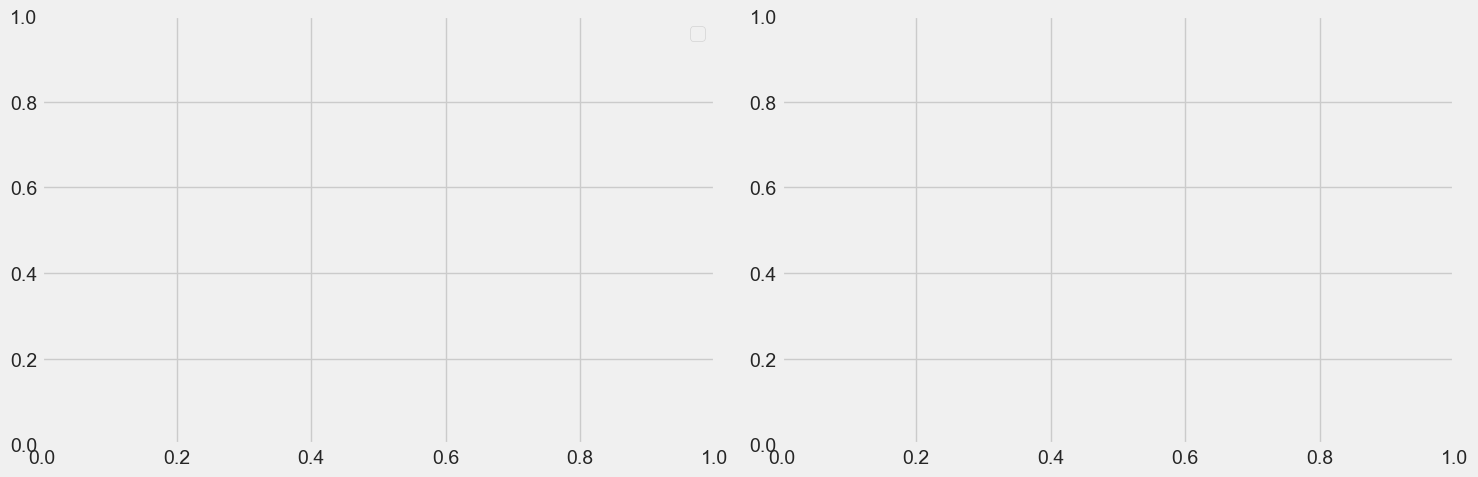

In [80]:
# You can also visualize the daily returns and standard deviation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for company, ax in zip(company_list, axes):
    # Print column names to check what's available
    print(f"Columns in {company['company_name'].iloc[0]} DataFrame: {company.columns}")
    
    company_name = company["company_name"].iloc[0]
    
    # Check if 'Daily Return' is present in the columns
    if 'Daily Return' in company.columns:
        company['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o')
        ax.set_title(f'Daily Return - {company_name}')
    else:
        print(f"'Daily Return' column not found in {company['company_name'].iloc[0]} DataFrame.")

axes[0].legend(company_name)
plt.tight_layout()
plt.show()

# 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [13]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-11-21,NaN,NaN,NaN,NaN
2022-11-22,0.014661,0.008003,0.015653,0.012311
2022-11-23,0.005926,0.009979,0.015309,0.010407
2022-11-25,-0.019594,-0.007649,-0.012346,-0.000364
2022-11-28,-0.026264,0.005781,-0.013832,-0.023152


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

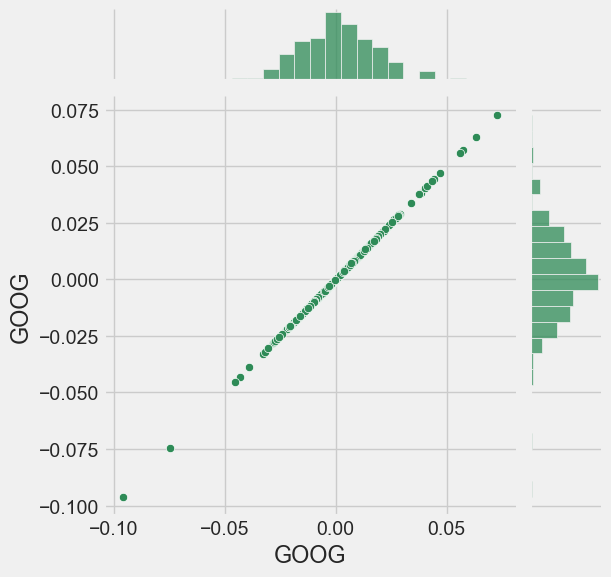

In [14]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

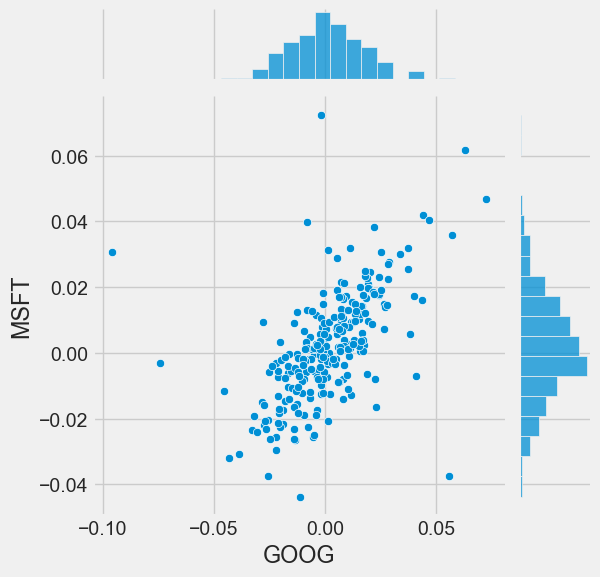

In [12]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

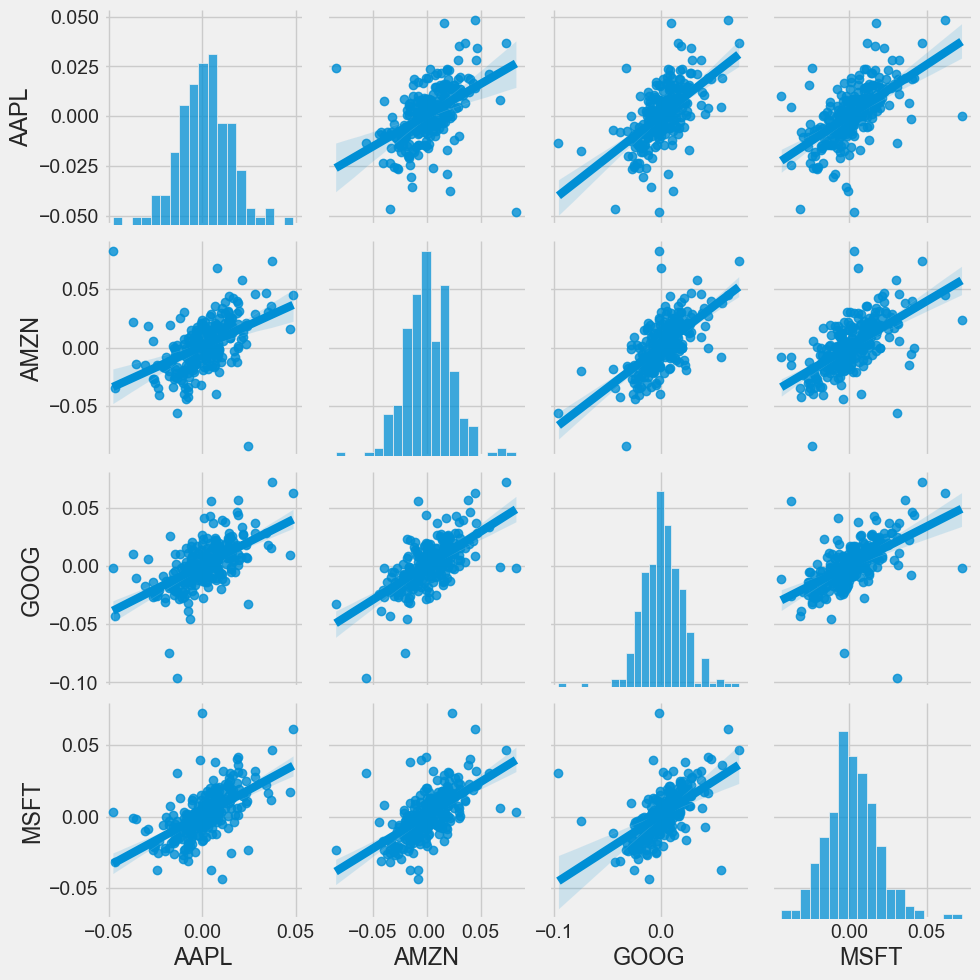

In [15]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. 

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

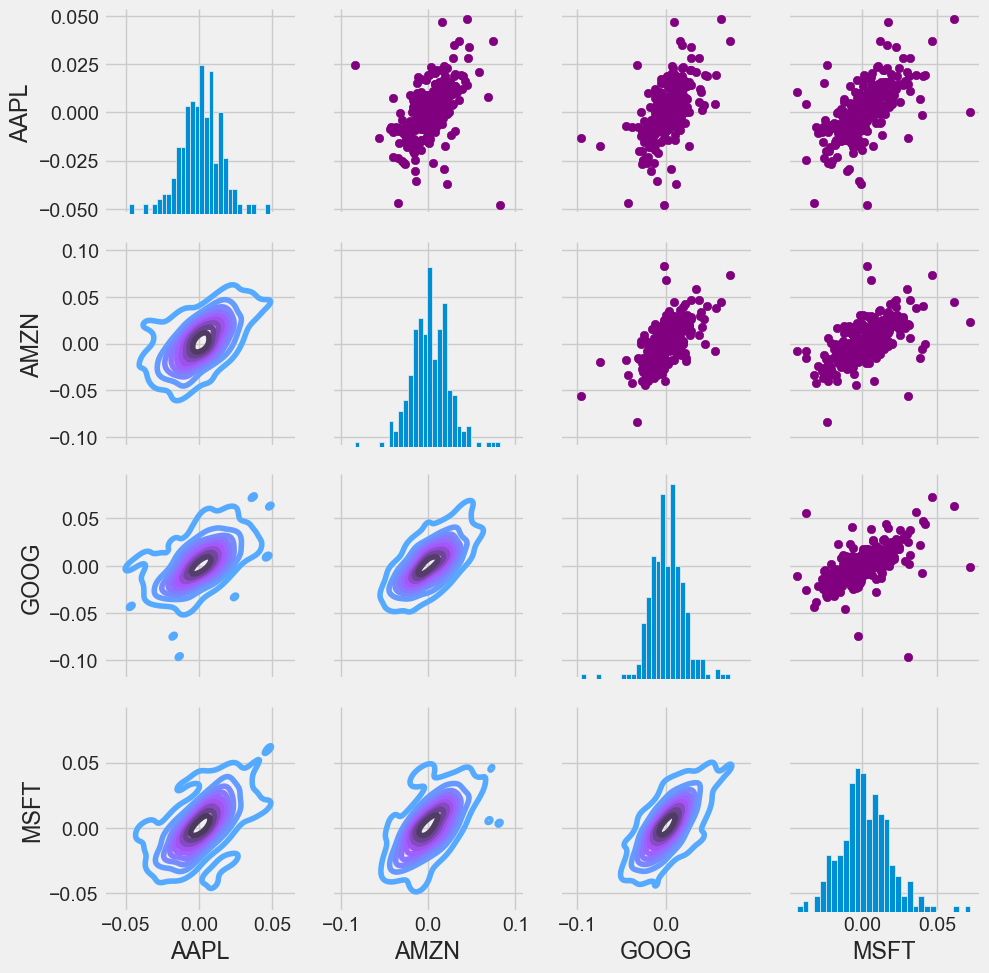

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

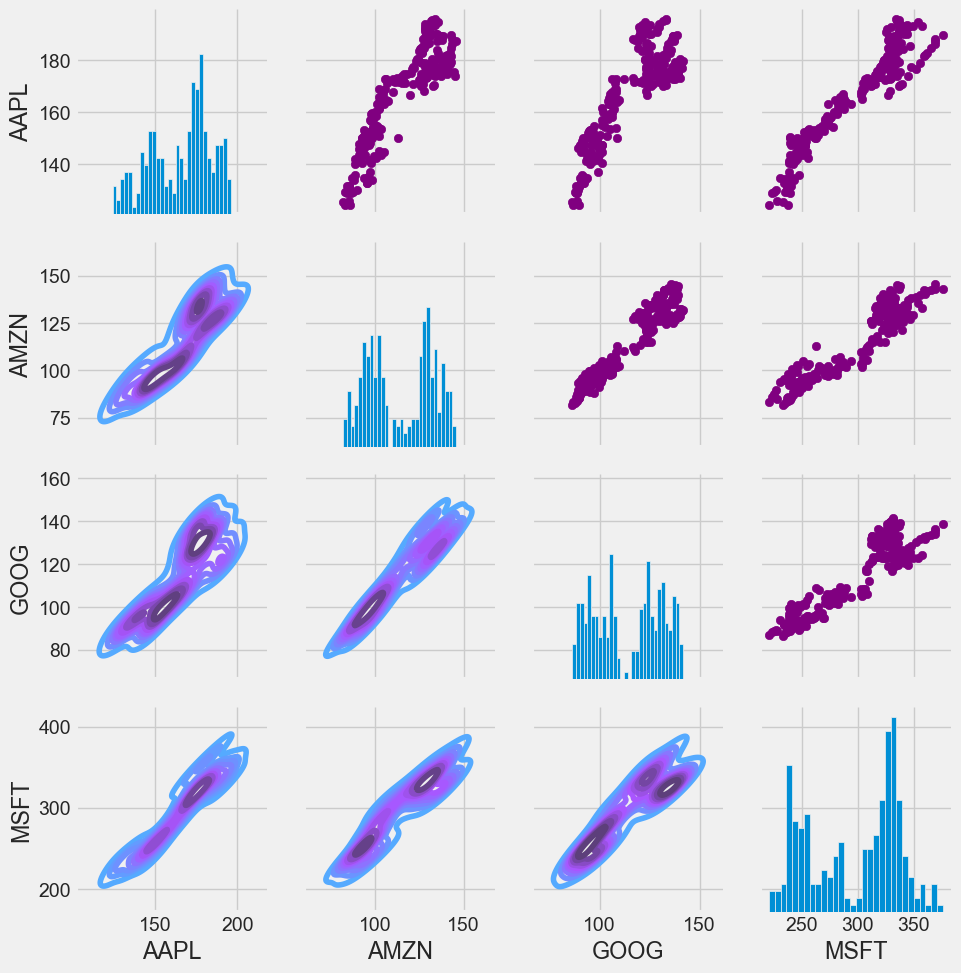

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

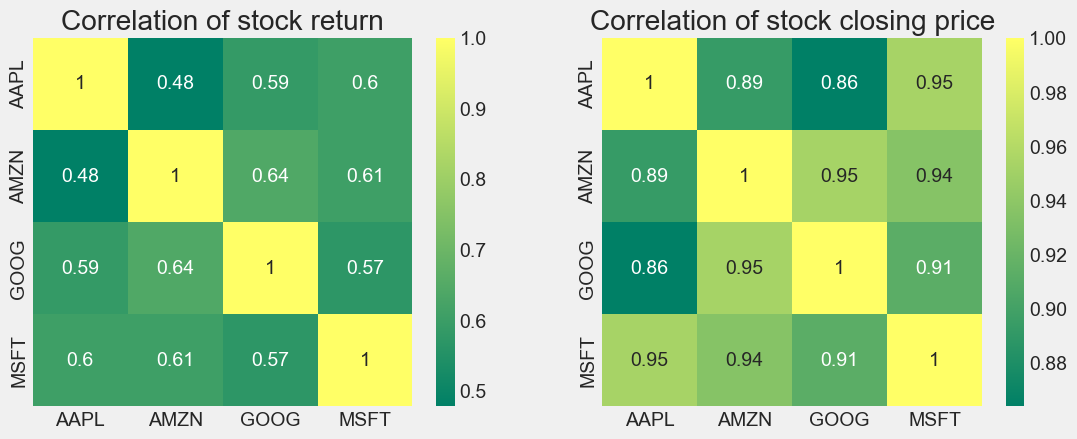

In [17]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

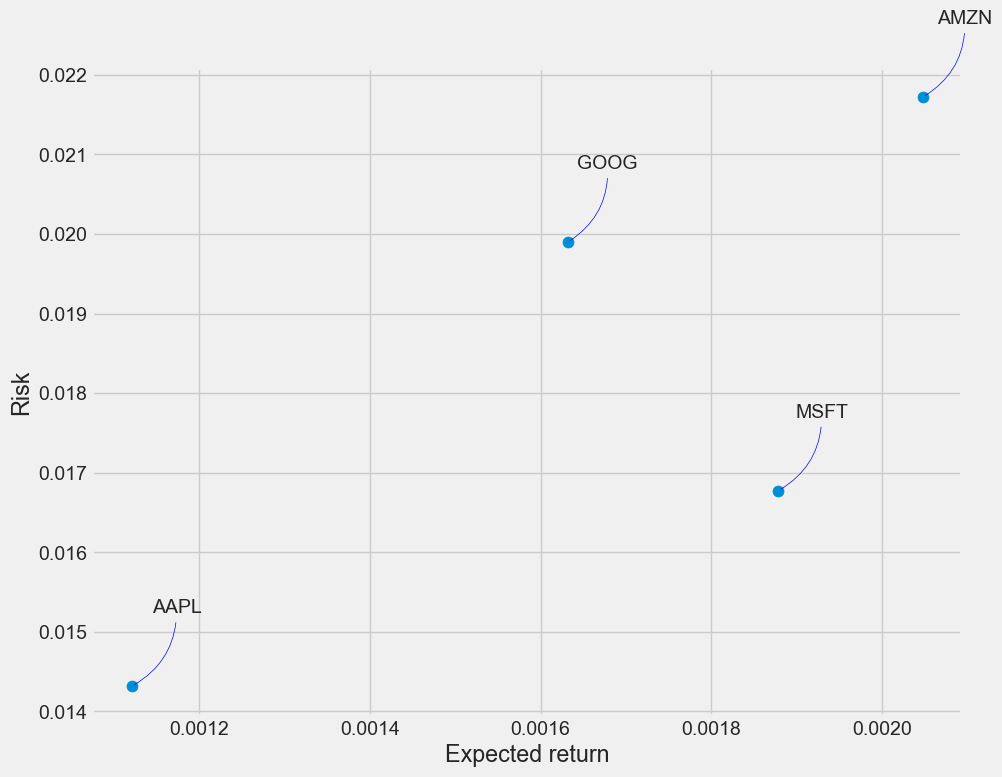

In [18]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of APPLE inc:

In [19]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449692,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516594,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655551,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787855,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767568,394024400
...,...,...,...,...,...,...
2023-11-13,185.820007,186.029999,184.210007,184.800003,184.800003,43627500
2023-11-14,187.699997,188.110001,186.300003,187.440002,187.440002,60108400
2023-11-15,187.850006,189.500000,187.779999,188.009995,188.009995,53790500


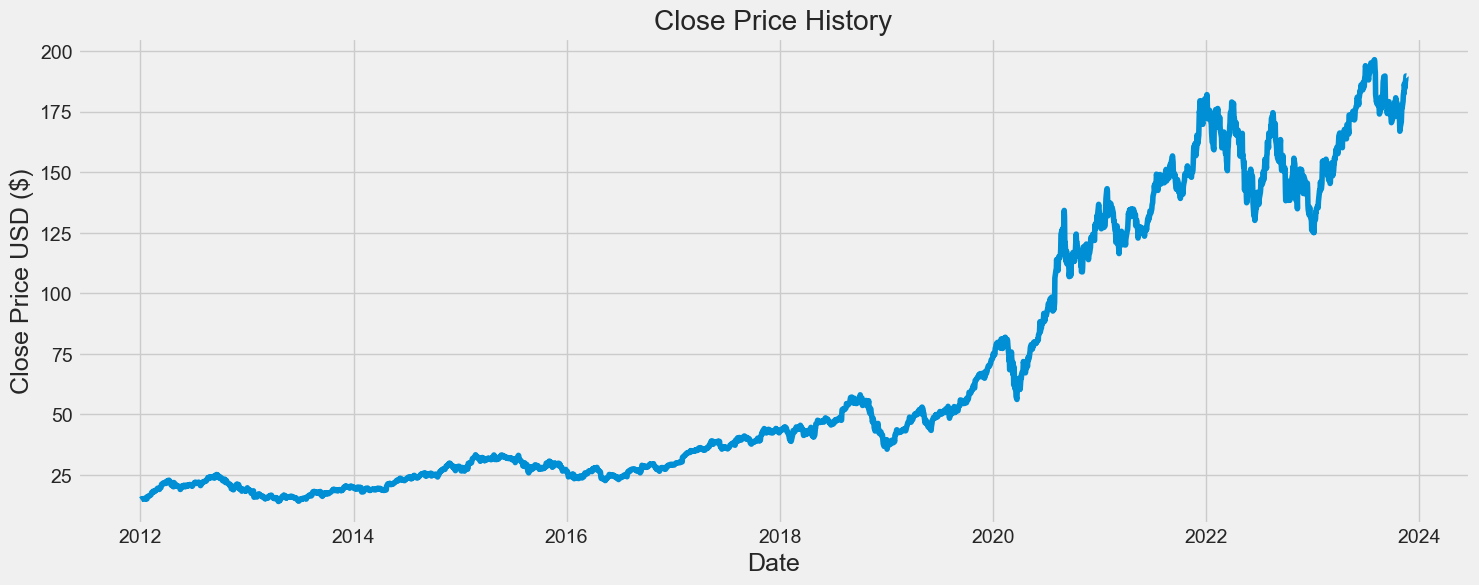

In [20]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [22]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2841

In [23]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.95375404],
       [0.96306905],
       [0.96295944]])

In [24]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

### LSTM model

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

### Train time

In [28]:
import time

# Measure the start time
start_time = time.time()

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2781/2781 [==============================] - 60s 21ms/step - loss: 5.4954e-04


The output you've posted indicates the training progress of your model. Let's break down the key elements:

- **2781/2781:** This represents the number of batches processed out of the total number of batches. In each epoch, the training data is split into batches to update the model's weights iteratively.

- **[==============================]:** The progress bar shows the completion of the batches. Each '=' sign represents one batch, and as the model processes more batches, you'll see more '=' signs until it completes the epoch.

- **- 60s:** This is the elapsed time for processing the entire training dataset for one epoch. In this case, it took approximately 60 seconds. This value indicates the efficiency of your training process. Faster training times are generally desirable, especially for large datasets.

- **- 21ms/step:** This indicates the average time taken to process one batch (step) in milliseconds. Lower values are generally better, indicating faster processing.

- **- loss: 5.4954e-04:** This is the value of your loss function (mean squared error in this case) on the training data. The goal of training a model is to minimize this value. A lower loss generally indicates a better fit of the model to the training data.

The `keras.callbacks.History` object returned by `model.fit` contains information about the training process, including loss values over epochs. This information can be useful for visualizing the training progress and diagnosing any issues, such as overfitting or underfitting.

In summary, your training process seems to be efficient, taking about 60 seconds for one epoch, and the loss on the training data is relatively low, indicating that the model is fitting well to the training set.

The efficiency of the training process is considered in the context of achieving a good model performance within a reasonable amount of time. Here are a few reasons why the training process you provided might be considered efficient:

1. **Duration of Training:** The training time of approximately 60 seconds for one epoch is relatively short. Shorter training times are generally preferred, especially when dealing with large datasets, as they contribute to faster model development.

2. **Batch Processing Speed:** The average time taken to process one batch (21 milliseconds per step) is quite fast. This indicates that your model processes each batch quickly, which is crucial for efficient training, especially when working with large datasets.

3. **Total Number of Steps:** The fact that the model was able to complete 2781 batches in the given time frame indicates good throughput. This means that, on average, each batch is processed quickly, allowing the model to learn from the entire training dataset efficiently.

4. **Low Loss:** The reported loss value (5.4954e-04) is relatively low. While the absolute value of the loss is specific to the problem and the scale of your data, a low loss generally indicates that the model is fitting well to the training data.

However, it's essential to note that the perception of efficiency can be task-dependent, and what is considered efficient for one problem might not be the same for another. Also, efficiency should be balanced with the quality of the model's performance (how well it generalizes to unseen data) and other considerations such as computational resources and time constraints.

In [ ]:
# Measure the end time
end_time = time.time()

# Calculate the training time in hours
training_time_hours = (end_time - start_time) / 3600

In [97]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 2s 19ms/step


3.3778715627385574

In [98]:
predictions

array([[167.46948],
       [168.57925],
       [168.90334],
       [168.25009],
       [167.61597],
       [166.60136],
       [165.84012],
       [167.15091],
       [169.10887],
       [170.59444],
       [171.03162],
       [170.56445],
       [169.33032],
       [171.16058],
       [173.18607],
       [173.97644],
       [174.79065],
       [175.33229],
       [175.13437],
       [174.58592],
       [174.11   ],
       [174.05661],
       [175.04794],
       [176.05916],
       [176.39375],
       [175.42805],
       [174.51904],
       [174.34758],
       [175.3761 ],
       [177.12141],
       [178.46654],
       [180.28928],
       [181.8735 ],
       [182.26746],
       [181.99156],
       [181.03468],
       [181.23347],
       [181.82292],
       [183.43015],
       [184.58833],
       [185.47008],
       [186.71187],
       [187.15868],
       [187.24239],
       [186.75673],
       [187.42714],
       [188.04427],
       [187.92581],
       [188.71614],
       [189.91072],


C:\Users\rwang\AppData\Local\Temp\ipykernel_36760\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


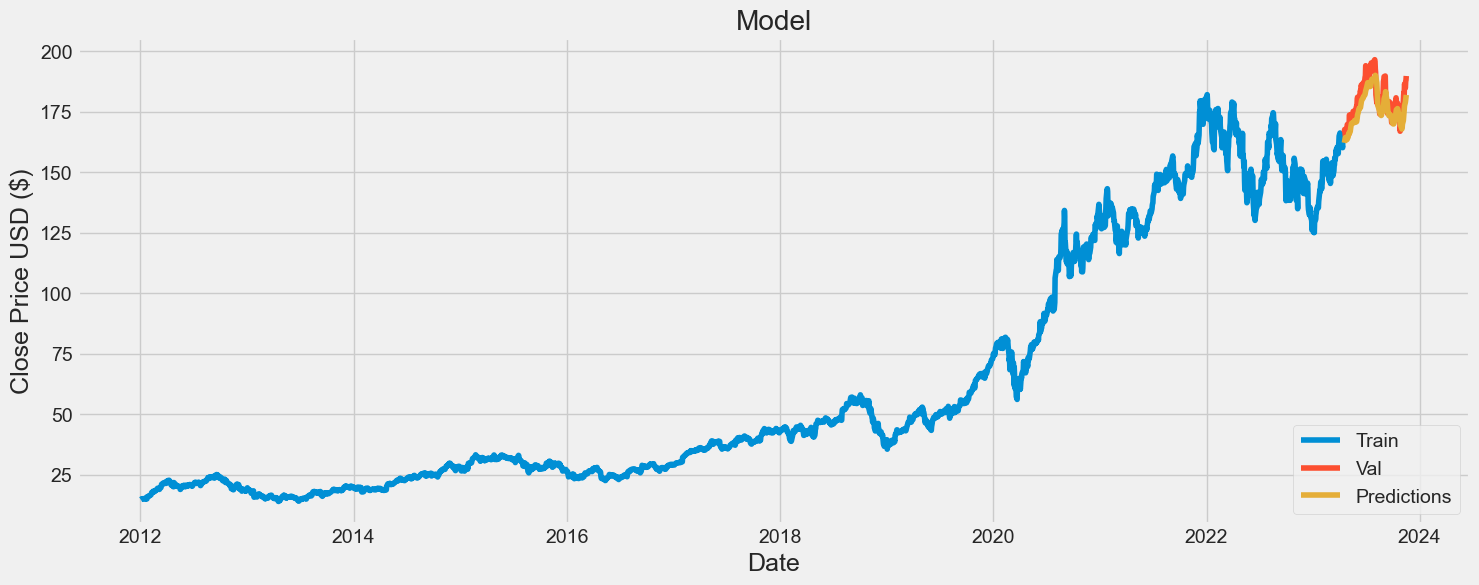

In [25]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [26]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-04-18,166.470001,162.111282
2023-04-19,167.630005,162.810837
2023-04-20,166.649994,163.649628
2023-04-21,165.020004,164.241608
2023-04-24,165.330002,164.365662
...,...,...
2023-11-10,186.399994,177.430069
2023-11-13,184.800003,178.894958
2023-11-14,187.440002,179.888901


# Summary
In this notebook, you discovered and explored stock data.

Specifically, you learned:

- How to load stock market data from the YAHOO Finance website using yfinance.
- How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
- How to measure the correlation between stocks.
- How to measure the risk of investing in a particular stock.

Do you have any questions?
Ask your questions in the comments below and I will do my best to answer.

References:
https://www.investopedia.com/terms/c/correlation.asp
[Jose Portilla Udemy Course: Learning Python for Data Analysis and Visualization](https://www.udemy.com/course/learning-python-for-data-analysis-and-visualization/)